![header.png](https://courses.physics.illinois.edu/phys246/fa2020/code/images/FD/fluid_header.png)

# Fluid Dynamics

* **Author:** June Vanlerberghe

* **Date:** October 22, 2020

* **Time spent on this assignment:** 5 hours

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
import itertools
from IPython.display import HTML
import pickle
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','math','FuncAnimation',
                       'HTML','itertools','pickle','testFunc']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    return

def testFunc(func,inFiles,outFiles):
    inputs  = [pickle.load(open(f,"rb")) for f in inFiles]
    outputs = [pickle.load(open(f,"rb")) for f in outFiles]
    result  = func(*inputs)
    allGood = True
    if not isinstance(result, tuple): result = (result,)
    for i in range(len(outputs)):
        if np.max(np.abs(result[i]-outputs[i])) > 1e-14:
            print("Failed test for",outFiles[i],i,"max_error=",np.max(np.abs(result[i]-outputs[i])))
            allGood = False
    if allGood: print("Test Passed!")
    else:       print("Test Failed :(")

Download the test files here, or download from the website and upload & unzip them to wherever this notebook file is

In [ ]:
!wget https://courses.physics.illinois.edu/phys246/fa2020/code/TestFiles.zip && unzip TestFiles.zip

--2020-10-22 21:02:14--  https://courses.physics.illinois.edu/phys246/fa2020/code/TestFiles.zip
Resolving courses.physics.illinois.edu (courses.physics.illinois.edu)... 130.126.151.14
Connecting to courses.physics.illinois.edu (courses.physics.illinois.edu)|130.126.151.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53041362 (51M) [application/x-zip-compressed]
Saving to: ‘TestFiles.zip.1’

TestFiles.zip.1     100%[===================>]  50.58M  12.9MB/s    in 6.6s    

2020-10-22 21:02:22 (7.67 MB/s) - ‘TestFiles.zip.1’ saved [53041362/53041362]

Archive:  TestFiles.zip
replace Microscopic_after_move.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Microscopic.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace rho_after_Micro2Macro.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Microscopic_after_bounce.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Microscopic2.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Microscopic_after_moveDen

## Python Warmup

### Useful functions:

Before we begin, we want to highlight some functions that you may find useful in this assignment. The last one we'll explore in more depth as well.
* `np.zeros([dimensions])` - create an array filled with all zeros.
    *Ex: `n = np.zeros([9,10,10])` creates a (9,10,10) array of all zeros
* `np.ones([dimensions])` - same thing as `np.zeros` but with all ones.
* `np.empty([dimensoons])` - same thing as `np,zeros` but fills array with garbage. Very fast compared to the above.
* `np.roll(x,shift,axis)` - shift array `x` by `shift` along `axis`.

### Warmup - using `np.roll`

Something we'll see later in this assignment is the need to shift elements right,left,up,down, and diagonally. Let's make a little test problem to illustrate how this works.

In [ ]:
# Run me!
x = np.arange(15).reshape(3,5)
print(x)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


Now we'll want to shift every element in `x` to the right, where we wrap everything around the edge. Rather than figuring this out with a for loop, we'll employ `np.roll` to do it fast!

In [ ]:
print(x,'\n')
print(np.roll(x,(0,1),(0,1)))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 

[[ 4  0  1  2  3]
 [ 9  5  6  7  8]
 [14 10 11 12 13]]


Now let's disect that command. The first `(0,1)` means don't shift the "y" direction, and to shift the "x" direction by +1. The next command `(0,1)` means to apply the shift to the two axes.  
Now let's go left:

second argument will always be (0,1) for this assignment

In [ ]:
print(x,'\n')
print(np.roll(x,(0,-1),(0,1)))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 

[[ 1  2  3  4  0]
 [ 6  7  8  9  5]
 [11 12 13 14 10]]


---
🦉 Now we'll try to implement a section of the Cha-Cha Slide([Lyrics](https://genius.com/Dj-casper-cha-cha-slide-lyrics))
```
♫Now it's time to get funky
To the right now, to the left
Take it back now y'all♪
```

Make your `x` array go right, then left, then "down". Your output should be:
```
[[ 4  0  1  2  3]
 [ 9  5  6  7  8]
 [14 10 11 12 13]]
[[ 1  2  3  4  0]
 [ 6  7  8  9  5]
 [11 12 13 14 10]]
[[ 5  6  7  8  9]
 [10 11 12 13 14]
 [ 0  1  2  3  4]]
```
(Notice how down isn't what you may expect...)

In [ ]:
print(x, '\n')
print(np.roll(x, (0, 1), (0,1)))
print(np.roll(x, (0, -1), (0,1)))
print(np.roll(x, (-1, 0), (0,1)))
#np.roll wraps the opposite way: so when moving down, it looks like its going up
#when vel is negative, wrap it with 1

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 

[[ 4  0  1  2  3]
 [ 9  5  6  7  8]
 [14 10 11 12 13]]
[[ 1  2  3  4  0]
 [ 6  7  8  9  5]
 [11 12 13 14 10]]
[[ 5  6  7  8  9]
 [10 11 12 13 14]
 [ 0  1  2  3  4]]


🦉In a special version of the song, the next line goes
```
♫ Take it diagonally up and to the right now y'all
```
Implement this array move, you should get:
```
[[14 10 11 12 13]
 [ 4  0  1  2  3]
 [ 9  5  6  7  8]]
 ```

In [ ]:
print(x, '\n')
print(np.roll(x, (1, 1), (0, 1)))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 

[[14 10 11 12 13]
 [ 4  0  1  2  3]
 [ 9  5  6  7  8]]


Now you're a ~~Cha-Cha Slide~~ `np.roll` expert!

## Exercise 1: Fluid Dynamics

* **List of collaborators:**

* **References you used in developing your code:**

In this assignment you will produce a fluid dynamics simulations.  We are going to develop a number of functions which you will store in the cell below (as well as some global variables that we will use throughout this exercise).

In [ ]:
### global variables and functions
### function-cell - put everything in here!
nx=520; ny=180 #size of our simulation

def GenerateCylinderObstacle():
  obstacle = np.empty((nx, ny), dtype = 'bool')
  obstacle[:, :] = False
  for x in range(nx):
    for y in range(ny):
      if ((x-nx/4)**2 + (y-ny/2)**2) < (ny/9)**2:
        obstacle[x, y] = True
      else:
        obstacle[x, y] = False
  return obstacle

v=np.zeros((9,2),dtype='int')
v[0,:]=[0,0]
v[1,:]=[0,1]
v[2,:]=[0,-1]
v[3,:]=[1,0]
v[4,:]=[-1,0]
v[5,:]=[-1,-1]
v[6,:]=[-1,1]
v[7,:]=[1,-1]
v[8,:]=[1,1]

<div class="alert alert-danger" style="color:black">

If you have a function that takes in an array <code>n</code>, always make a new variable to return:
```python
def doMath(n):
    # nout = n.copy() #notice the .copy(), so that they aren't the same object
    nout = 2*n+5
    return nout
```

</div>

### a.  Making some obstacles

To simulate the real world on the computer, we'll break the tunnel into $n_x\times n_y$ squares which we'll call *voxels*.  


Your simulation will be doing fluid dynamics in a $n_x \times n_y$ "tunnel" which has some objects within it.  These objects will be represented by a boolean $n_x \times n_y$ size array `obstacle=np.empty((nx,ny),dtype='bool')` which should be `True` where the obstacle is and `False` otherwise. For example,
```python
obstacle[:,:]=False
obstacle[50:70,50:70]=True
```
would set up a square $20 \times 20$ object inside our tunnel.

🦉Add a `GenerateCylinderObstacle()`  function to the "function-cell" above which generates a object which is a cylinder located at $(n_x/4,n_y/2)$ with a radius of $n_y/9$

If you do `plt.matshow(GenerateCylinderObstacle())` it should look like this

![cylinder obstacle](https://courses.physics.illinois.edu/phys246/fa2020/code/images/FD/cyl_obstacle.png)


<div class="alert alert-warning" style="color:black">
<h3><b>Do not use the word <code>object</code> as a variable!</b></h3>
Notice how <code>object</code> is green in a cell - this means it is a special keyword.<br />
</div>

#### Test:

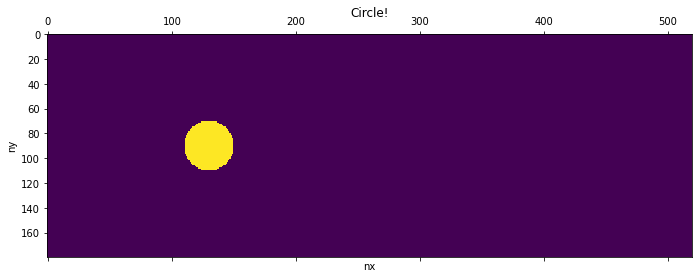

In [ ]:
## Call your function here to see if if works.
plt.matshow(GenerateCylinderObstacle().transpose())
plt.title("Circle!")
plt.xlabel('nx')
plt.ylabel('ny')
plt.show()

## b.  Microscopic velocities $v_i$

To simulate the real world on the computer, we'll break the tunnel into $n_x\times n_y$ squares which we'll call *voxels*.

The key quantity in your simulation is  nine microscopic degrees of freedom
* $n_k(i,j)$ where $0\leq k \leq 8$ and $(i,j)$ are over the $n_x \times n_y$ voxels of your simulation

which are going to be nine different densities (for each voxel $(i,j)$) which correspond to the density of a fluid at $(i,j)$ moving in nine different directions (or velocities $v_k$):
* $n_0$: stationary fluid moving at velocity $v_0=(0,0)$
* $n_1$: fluid moving up moving at velocity $v_1=(0,1)$
* $n_2$: fluid moving down at velocity $v_2=(0,-1)$
* $n_3$: fluid moving right at velocity $v_3=(1,0)$
* $n_4$: fluid moving left at velocity $v_4=(-1,0)$
* $n_5$: fluid moving left-down at velocity $v_5=(-1,-1)$
* $n_6$: fluid moving left-up at velocity $v_6=(-1,1)$
* $n_7$: fluid moving right-down at velocity $v_7=(1,-1)$
* $n_8$: fluid moving right-up at velocity $v_8=(1,1)$
    
It will be useful to have access to these microscopic velocities as global variables.  🦉**Go ahead and add to the top of your "function-cell" the various velocities:**
```python
v=np.zeros((9,2),dtype='int')
v[0,:]=[0,0]
v[1,:]=[0,1]
...
```

**Plot these (below) as**
```python
for i in range(0,9):
    plt.arrow(0,0,v[i,0],v[i,1],head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.show()
```
and make sure it looks like
![velocity arrows](https://courses.physics.illinois.edu/phys246/fa2020/code/images/FD/velocity_arrows.png)

#### Test:

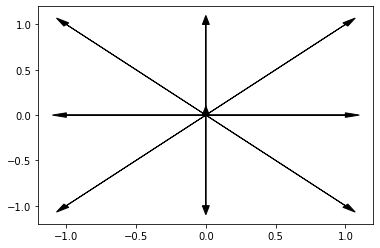

In [ ]:
## Plot your microscopic velocities

for i in range(0,9):
    plt.arrow(0,0,v[i,0],v[i,1],head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.show()

We will represent the microscopic densities by a variable
* `n=np.zeros(9,nx,ny)`


The high level algorithm for fluid dynamics is very simple.  After setting up the initial conditions, we loop many times doing
* Adjust boundary conditions
* Collide the microscopic densities
* Move the microscopic densities


### c. Computing macroscopic quantities from the microscopic density

Given the microscopic densities, there are two macroscopic quanties:
* the macroscopic density $\rho(i,j)=\sum_k n_k$ (*size: $n_x \times n_y$*)
* the macroscopic velocity $\vec{u}(i,j) \equiv (u_x(i,j),u_y(i,j)$ (*size: $2 \times n_x \times n_y$*) where
    * $u_x(i,j) = 1/\rho \sum_k v_{k,x}\, n_k(i,j)$
    * $u_y(i,j) = 1/\rho \sum_k v_{k,y}\, n_k(i,J)$

which you will compute using the function (you will write) `(rho,u) = Micro2Macro(n)`

🦉Go ahead and write this function and add it to your 'function-cell'

You can test it using these lines of code:
```python
testFunc(Micro2Macro,["Microscopic.dat"],["rho_after_Micro2Macro.dat","u_after_Micro2Macro.dat"])
```
and see if it print two zeros (which is a success!)

**Tip:** Because `u` is $(2,n_x,n_y)$, we can get `ux` by doing `u[0]` (which is then a $(n_x,n_y)$ array) and `uy` by doing `u[1]`.

In [ ]:
def Micro2Macro(n):
  rho = np.sum(n,axis = 0)
  uy = (1/rho)*(n[1,:,:]+n[6,:,:]+n[8,:,:]-n[2,:,:]-n[5,:,:]-n[7,:,:])
  ux = (1/rho)*(n[3,:,:]+n[7,:,:]+n[8,:,:]-n[4,:,:]-n[5,:,:]-n[6,:,:])
  u = (ux,uy)
  return rho, u

#### optional - `np.einsum`

Figuring out the summations effeciently can be a pain, but we can use [`np.einsum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.einsum.html) help out here. Figure out how to rewrite the above problem with einstein summation notation. To use the function, if we have
$$
A_{ijk}\cdot B_{dk} = C_{ijd},
$$
we'd use then call:
```python
C = np.einsum("ijk,dk->ijd",A,B)
```

#### Test:

In [ ]:
testFunc(Micro2Macro,["Microscopic.dat"],["rho_after_Micro2Macro.dat","u_after_Micro2Macro.dat"])

Test Passed!


### d. Getting the equilibrium microscopic densities.


Given the macroscopic densities $\rho$ and $\vec{u}$, there is a *equilibrium* microscopic densities $n_{eq}$ (*size: $9 \times n_x \times n_y$*) which you will compute using `n_eq=Macro2Equilibrium(rho,u,obstacle)`

The relevant formula for this is

$$ n^{eq}(v_k) \equiv n_k^{eq} =  \omega_k \rho \left(1 + 3 \vec{v_k} \cdot \vec{u} + \frac{9}{2}(\vec{v_k} \cdot \vec{u})^2- \frac{3}{2}(\vec{u}\cdot \vec{u}) \right)  \tag{A} $$

where
* $\omega_{0}=4/9$
* $\omega_{1-4}=1/9$
* $\omega_{5-8}=1/36$

Given some microscopic densities $n$ you should be able then to figure out the equilibrium microscopic densities $n_{eq}$.  

🦉Write the functions `Macro2Equilibrium` adding them to your "function-cell"

You can test it by checking if
```python
testFunc(Macro2Equilibrium,["rho_after_Micro2Macro.dat","u_after_Micro2Macro.dat"],["Microscopic_after_equilibrium.dat"])
```
is equal to zero.

#### Test:

In [ ]:
def Macro2Equilibrium(rho,u):
  omega = [4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36]
  n_eq = []
  for k in range(9):
    n = omega[k]*rho*(1 + 3*(v[k,0]*u[0]+v[k,1]*u[1]) + (9/2)*(v[k,0]*u[0]+v[k,1]*u[1])**2 - (3/2)*(u[0]**2+u[1]**2))
    n_eq.append(n)
  return np.array(n_eq)

In [ ]:
 testFunc(Macro2Equilibrium,["rho_after_Micro2Macro.dat","u_after_Micro2Macro.dat"],["Microscopic_after_equilibrium.dat"])

Test Passed!


### d. Implementing collision

Once you can compute these quantities, the next step is to implement the collision step.  

🦉Write a function `Collision(n,obstacle)` which returns the density `n` after collision.  Put it in your function-cell above.


When we collide the microscopic densities, we get new microscopic densities given as  
* `nout = n * (1-omega) + omega * neq`

Here are the steps for the function:
1. Calculate `neq`  
  a. take the microscopic densities $\rightarrow$ compute the macroscopic density and velocity `(rho,u) = Micro2Macro(n)`  
  b. take the macroscopic density and velocity $\rightarrow$ compute the equilibrium microscopic densities `neq=Macro2Equilibrium(rho,u)`  
2. Calculate `nout = n * (1-omega) + omega * neq`     
  a. $\omega$ is the viscosity parameter.  We will use $\omega =1.9572953736654806$
3. We moved fluid where the obstacle is, so we need to undo this. Reset all `nout` where the obstacle is to be the same as `n`


Test with
```python
testFunc(lambda x: Collision(x,GenerateCylinderObstacle()),["Microscopic.dat"],["Microscopic_after_collision.dat"])
```


#### Test:

In [ ]:
def Collision(n, obstacle):
  omega = 1.9572953736654806
  rho, u = Micro2Macro(n)
  neq = Macro2Equilibrium(rho,u)
  nout = n*(1-omega) + omega*neq
  for k in range (9):
    for i in range(nx):
      for j in range(ny):
       if obstacle[i,j] == True:
         nout[k,i,j] = n[k,i,j]
  return nout

In [ ]:
testFunc(lambda x: Collision(x,GenerateCylinderObstacle()),["Microscopic.dat"],["Microscopic_after_collision.dat"])

Test Passed!


### e. Moving

We'll now move on to getting the fluid to move. This will be a function called, surprise, `Move(n,obstacle)`. But first we need to helper functions:
* `Bounce(n,obstacle)`
    * bounce the velocities - that is every velocity where the obstacle is gets reversed
* `MoveDensity(n)`
    * Move all your densities in the direction of the velocity (*hint* the velocity tells you where to move it)
    * Assume periodic boundary conditions here

Thus a `Move(n,obstacle)` call is just a `Bounce` then `MoveDensity`. 🦉Write this function and test!


Test:
```python
testFunc(lambda x: Bounce(x,GenerateCylinderObstacle()),["Microscopic.dat"],["Microscopic_after_bounce.dat"])

testFunc(MoveDensity,["Microscopic.dat"],["Microscopic_after_moveDensity.dat"])

testFunc(lambda x: Move(x,GenerateCylinderObstacle()),["Microscopic.dat"],["Microscopic_after_move.dat"])
```

#### Tests:

In [ ]:
def Bounce(n, obstacle):
  new = n.copy()
  for k in range (9):
    for i in range(nx):
      for j in range(ny):
        if(obstacle[i,j] == True):
            new[k,:,:] = -1*n[k,:,:]
  return new

def MoveDensity(n):
  np.roll(n[0,:,:], (0,0), (0,1))
  np.roll(n[1,:,:], (1,0), (0,1))
  np.roll(n[2,:,:], (-1,0), (0,1))
  np.roll(n[3,:,:], (0,1), (0,1))
  np.roll(n[4,:,:], (0,-1), (0,1))
  np.roll(n[5,:,:], (-1,-1), (0,1))
  np.roll(n[6,:,:], (1,-1), (0,1))
  np.roll(n[7,:,:], (-1,1), (0,1))
  np.roll(n[8,:,:], (1,1), (0,1))
  return n

In [ ]:
def Move(n, obstacle):
  Bounce(n, obstacle)
  MoveDensity(n)
  return n

In [ ]:
testFunc(lambda x: Bounce(x,GenerateCylinderObstacle()),["Microscopic.dat"],["Microscopic_after_bounce.dat"])
testFunc(MoveDensity,["Microscopic.dat"],["Microscopic_after_moveDensity.dat"])
testFunc(lambda x: Move(x,GenerateCylinderObstacle()),["Microscopic.dat"],["Microscopic_after_move.dat"])

Failed test for Microscopic_after_bounce.dat 0 max_error= 1.9999999931623704
Test Failed :(
Failed test for Microscopic_after_moveDensity.dat 0 max_error= 0.9980962312114775
Test Failed :(
Failed test for Microscopic_after_move.dat 0 max_error= 0.9980962312114775
Test Failed :(


### f.  Boundary conditions

In the y-direction, we are just going to assume that the boundary conditions are periodic. For the x-direction, we are going to assign certain boundary conditions on the left and right.  

Let's call this function `FixBoundary(n,n_init)` which applies these boundary conditions and returns the new density `n`.

**Left:** we are going to assume that there is a flow - this means that the microscopic densities are the same at each step.  Therefore, what we should do is simply replace the current densities on the left-most row with the initial microscopic densities (`n_init`).

**Right:** we are going to assume that the gradient is zero - i.e. the important physics has dissapeared by this point.  To do this, we will set

```python
# loop over all microscopic velocities vL that are going left
   nout[vL,-1,:] = nout[vL,-2,:]
```
*Hint:* there are 3 `vL`s.


🦉Put all of this together and run the next test!

Testing:
```python
testFunc(FixBoundary,["Microscopic.dat","Microscopic2.dat"], ["Microscopic_after_boundary.dat"])
```


#### Test:

In [ ]:
def FixBoundary(n, n_init):
  new = n.copy()
  new[:,0,:] = n_init[:,0,:]
  for vL in [4,5,6]:
    new[vL,-1,:] = n[vL,-2,:]
  return new

In [ ]:
testFunc(FixBoundary,["Microscopic.dat","Microscopic2.dat"], ["Microscopic_after_boundary.dat"])

Test Passed!


### g. Setting up the initial conditions

We need to generate an initial conditions. The way that we are going to do that is
* pick some macroscopic density $\rho$ of size $(n_x,n_y)$ (uniformly equal to 1.0) and a
* macroscopic velocity $\vec{u}(i,j)$ (sizes $(2,n_x,n_y)$)
    * `0.04*(1.0+1e-4*np.sin(j/(ny)*2*np.pi))` in the x-direction ( $u_x(i,j)$ aka 0). This introduces a very tiny anisotropy to the system.
    *  zero in the y-direction ($u_y(i,j)$ aka 1)
* compute the equilibrium density $n_{eq}$ associated with the initial density and velocities.   
* **Use (and return) this as the initial conditions**

🦉Write a function `Setup()` which returns the initial microscopic densities.  Remember to save this as you will need it to apply your boundary conditions.

I get the following when I visualize it as `plt.matshow(Setup()[3].transpose())`

![initial density](https://courses.physics.illinois.edu/phys246/fa2020/code/images/FD/init_density.png)

A quick test here is just to check that the following:
```python
print("All good?",(np.abs(np.max(Setup())-0.443377991)<1e-5) and ((np.abs(np.min(Setup())-0.0245774711)<1e-5)))
```

In [ ]:
def Setup():
  rho = 1
  for j in range(ny):
    u = [0.04*(1.0+1e-4*np.sin(j/(ny)*2*np.pi)), 0]
  n = Macro2Equilibrium(rho, u)
  return n

#### Test:

In [ ]:
print("All good?",(np.abs(np.max(Setup())-0.443377991)<1e-5) and ((np.abs(np.min(Setup())-0.0245774711)<1e-5)))

All good? True


### h. Putting it all together

🦉Write a function `Run(steps,record,n,n_init,obstacle)` (up in your function-cell) which takes
* the number of steps `steps` you want to run
* how often you want to `record` the velocity and density
* the microscopic densities `n` to start running from
* as well as the initial microscopic densities `n_init` for the boundary conditions (often equal to `n.copy()`)
* and the obstacle boolean array.

Each step consists of:
1. Adjust boundary conditions
2. Collide the microscopic densities
3. Move the microscopic densities

It should return
* a list of macroscopic densities `rhos`
* a list of macroscopic velocities `us`
  * This will be `u2=`$\sqrt{\vec{u}\cdot\vec{u}}$
  * To help us later, store these as `u2.transpose()`
* the last microscopic density `n`

Now (below) call your `Setup` and `Run` functions. Then plot the final configuration (something like `plt.matshow(us[-1])`).  

🦉Run for 201 steps recording every 100 steps.

#### Answer:

In [ ]:
def Run(steps,record,n,n_init,obstacle):
  rhos = []
  us = []
  for s in range(steps):
    n = step(n, n_init, obstacle)
    if (s%record == 0):
      rho, u = Micro2Macro(n)
      rhos.append(rho)
      us.append(u)
  return rhos, us, n

def step(n, n_init, obstacle):
  FixBoundary(n, n_init)
  Collision(n, obstacle)
  Move(n, obstacle)
  return n

In [ ]:
n = Setup()
Run(201, 100, n, n.copy(), GenerateCylinderObstacle())

IndexError: ignored

### i. Animation

🦉Now write a function `AnimateMe(us_flat,vMax)` which is going to take a list of velocities `us_flat` (and maximum for the `vMax`) and going to return an animation which is going to be then produced by calling
```python
anim = AnimateMe(us,vMax)
HTML(anim.to_jshtml())
```

This function will look like:
```python
def AnimateMe(us_flat,vMax):
    fig, ax = plt.subplots()
    cax = ax.imshow(us_flat[1],cmap=plt.cm.Reds,vmin=0,vmax=vMax)
    plt.close(fig)
    def animate(i):
         cax.set_array(us_flat[i])

    anim = FuncAnimation(fig, animate, interval=100, frames=len(us_flat))
    return anim
```



#### Answer:

In [ ]:
def AnimateMe(us_flat,vMax):
    fig, ax = plt.subplots()
    cax = ax.imshow(us_flat[1],cmap=plt.cm.Reds,vmin=0,vmax=vMax)
    plt.close(fig)
    def animate(i):
         cax.set_array(us_flat[i])

    anim = FuncAnimation(fig, animate, interval=100, frames=len(us_flat))
    return anim

anim = AnimateMe(us,vMax)
HTML(anim.to_jshtml())

### j. Speed Test (EC)
*5 Points*

Our code for for `%time Run(2000,3000,Setup(),Setup(),GenerateCylinderObstacle())` takes between 45 and 60 seconds. We'll give 5 points if you can make your code faster than 40 seconds runtime (on colab or our computers). Warning: we aren't sure this is possible!

#### Answer:

## Exercise 2: Walls

* **List of collaborators:**

* **References you used in developing your code:**

In this exercise we are going to use all the same code but generate a different object.  Here generate an object which consists of two walls:
* one spans $50 \leq x \leq 60$ and $n_y/4 \leq y \leq 3n_y/4$
* the other spans $200 \leq x \leq 210$ and $n_y/4 \leq y \leq 3n_y/4$

🦉Run your code again with this new obstacle and generate a new animation.

#### Answer:

In [ ]:
obstacle = np.empty((nx, ny), dtype = 'bool')
obstacle[:, :] = False
for i in range(nx):
  for j in range(ny):
    if(i >= 50 and i <= 60 and j >= ny/4 and j <= 3*ny/4):
      obstacle[i,j] == True
    if(i >= 200 and i <= 210 and j >= ny/4 and j <= 3*ny/4):
      obstacle[i,j] == True


In [ ]:
n = Setup()
Run(201, 100, n, n.copy(), obstacle)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


KeyboardInterrupt: ignored

## Exercise 3: Something new... (EC)
*(Extra credit: 5 points)*


* **List of collaborators:**

* **References you used in developing your code:**

🦉Come up with something new and cool to do with this animation code.  Maybe try out some other interesting obstacles are add some friction to the walls or such.

#### Answer:

---
**Copyright:** Byan Clark and Ryan Levy (2019)